In [1]:
#In order to read the teacher observation note more effeciently. Practice a way to extracting, grouping the text data into information
#Referencing Source A: https://www.kaggle.com/code/tejashpopate/text-mining-in-python. Referencing Source B:https://towardsai.net/p/data-mining/text-mining-in-python-steps-and-examples-78b3f8fd913b
#Further mining the topic of the text: https://monkeylearn.com/topic-analysis/. Text Classification:https://realpython.com/python-keras-text-classification/
#Training Dataset: SchoolMintGrow QuickFeedback observation
#Training Maetrial : https://portal.smarterbalanced.org/library/en/ela-construct-relevant-vocabulary.pdf
#Testing Dataset: SchoolMintGrow Teacher Observation
#Project Roadmap:Stage 1, successfully tested on Glow - Glow with Word Cloud and LDA Topic Extracting on sampled data set
                #Stage 2, Test on Grow - Grow.
                #Stage 3, Test on full data set with Glow -Glow and Grow - Grow.
                #Stage 4, Test on survey response to replicate, optimize, clean the code book.
                #Stage 5, Continue build up the model with clustering model, the data set needs to be trained(Categorized).
                #Stage 6, Apply the trained clustered model to new testing data source to automatically assign the category by the machine. Quality check manually.
                

In [3]:
!pip install textblob
!pip install vaderSentiment
!pip install textmining3
!pip3 install wordcloud
#import gensim
import pandas as pd
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
Analyzer = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
import string
import nltk
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from gensim.utils import simple_preprocess
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# set the working dierectory

df = pd.read_excel('/Users/lipingsun/Desktop/wcpa/Teacher Evaluation/Feedback Activity.xlsx')
df['Glow - Glow']=df['Glow - Glow'].astype('str')

output='/Users/lipingsun/Desktop/wcpa/Teacher Evaluation/Output_SMG_tableau.xlsx'

In [4]:
df[:5]

,Observer Name,Observee Name,Date of Observation,School,Glow - Topic,Glow - Glow,Grow - Grow,Action Steps
0,Acacia Briseno,Chelsea Rodriguez,"1/17/23, 10:03 am",Delano Elementary School,Students Share Ideas,Paused the reading to ask TBQs Provide multipl...,"During the reading, 10 students were either wi...","During reading, circulate the room ensuring al..."
1,Acacia Briseno,Jennifer Paletta,"1/17/23, 8:39 am",Delano Elementary School,Students Share Ideas,"Paused to ask TBQ, re-read the section when st...",Have a clear reading focus that is aligned to ...,Map out TBQ questions in your teacher novel th...
2,Acacia Briseno,Isaac De La Cruz,"1/18/23, 1:15 pm",Delano Elementary School,Check Understanding,Use of the rolling whiteboard to model work fo...,"Check understanding from all students, not jus...","To avoid having the same student give answer, ..."
3,Acacia Briseno,Maria Hernandez,"1/18/23, 1:28 pm",Delano Elementary School,Reenforce Positive Behavior,Reviewing what CASE means with visual aids Awa...,The same student was called on 8 times in abou...,"Prior to starting the lesson, let students kno..."
4,Acacia Briseno,Victoria Rodriguez,"1/18/23, 9:38 am",Delano Elementary School,NaN,"When giving instructions, you paused the whole...",Increase student discourse by discussing artwo...,Great way to push student learning is providin...


In [5]:
import nltk
>>> nltk.download()
# define the stopwords and also import predefined ones
stop=set(stopwords.words("english"))
# Extract punctuation marks
punct_exclude=set(string.punctuation)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [6]:
from nltk.corpus import brown
>>> brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [7]:
# perform preoprocessing using function below
def clean(doc):
    stop_free=" ".join([i for i in doc.lower().split() if i not in stop])
    punct_free=''.join(ch for ch in stop_free if ch not in punct_exclude)
    num_free=''.join(i for i in punct_free if not i.isdigit())
    return num_free
####Column index 4(Glow to Glow). There is a problem of using the index 5(Grow to Grow) or 6(Action Steps) because there are some blank values.
####Need to address that either through the raw data file or through the data selection by eleminating the Nulls:dropping rows where 'Review Text' is null
#df.dropna(subset=['Grow - Grow'], inplace=True)
post_corpus=[clean(df.iloc[i,6]) for i in range(0,df.shape[0])] ###1/4Change the iloc to appropriate index number to switch


In [8]:
print(type(post_corpus))
print(post_corpus[5])

<class 'list'>
unclear observation standard teaching today questions posing students echoed  citing text evidence however students point view page desk questions asked also aligned standard listed board rl align point view two characters asked students learning today   able articulate response think back pd critical consumer curriculum begin end mind create questions align standard goal want able achieve end lesson questions ask students gradually release demonstrating mastery part standard day


In [9]:
# create term document matrix
tdm=textmining.TermDocumentMatrix() # use a function from textmining library
for i in post_corpus:
    #print(i)
    tdm.add_doc(i)# update the matrix with each variable conversion

In [10]:
type(tdm)

textmining.TermDocumentMatrix

In [11]:
output='/Users/lipingsun/Desktop/wcpa/Teacher Evaluation/Output_smg_tableau.xlsx'

In [12]:
#write tdm into dataframe
tdm.write_csv("TDM_DataFrame.csv",cutoff= 1) #cutoff won't consider 1st line

In [13]:
def buildMatrix(self,document_list):
        print("building matrix...")
        tdm = textmining.TermDocumentMatrix()
        for doc in document_list:
             tdm.add_doc(doc)
        #write tdm into dataframe
        tdm.write_csv(r'path\matrix.csv', cutoff=1)

In [14]:
Result=pd.read_csv("TDM_DataFrame.csv")

In [15]:
Result.head(20)

,reading,students,either,head,book,opened,pair,share,shared,partner,...,period,progress,made,semester,initiating,responded,strengthen,fact,everyone,empty
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.shape

(125, 8)

In [188]:
Result.shape

(125, 1062)

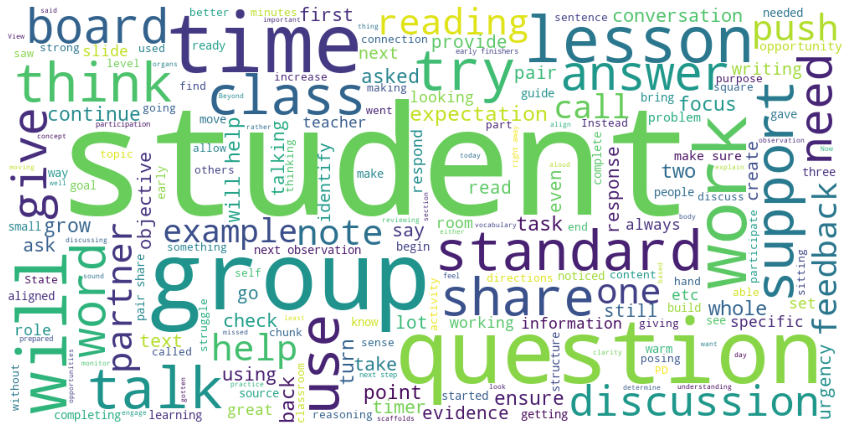

In [189]:
#plot wordcloud
wordcloud= WordCloud(width=1000,height=500, stopwords=STOPWORDS, background_color='white').generate(''.join(df['Grow - Grow'])) ###2/4Change the column name to appropriate one to switch
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [190]:
#Sentimental Analysis
FinalResult=pd.DataFrame()
for i in range(0,df.shape[0]):
    #print(i)
    blob=TextBlob(df.iloc[i,6]) ###3/4Change the iloc to appropriate index number to switch
    temp=pd.DataFrame({"Comments for Glow":df.iloc[i,6],"compound":blob.sentiment.polarity},index=[0])
    FinalResult=FinalResult.append(temp)

In [191]:
print(FinalResult.shape)
FinalResult[:10]
vs= Analyzer.polarity_scores("Vader sentiment looks interesting, I have high hopes!")
print(vs)

(125, 2)
{'neg': 0.0, 'neu': 0.509, 'pos': 0.491, 'compound': 0.6996}


In [192]:

FinalResult.head()
FinalResult[:30]
FinalResult.describe()


,compound
count,125.000000
mean,0.027822
std,0.156136
min,-0.225000
25%,-0.100000
50%,0.000000
75%,0.142500
max,0.600000


In [193]:
#Option 1: Follow the steps here to LDA Topic Modeling.
#https://www.analyticsvidhya.com/blog/2021/07/topic-modelling-with-lda-a-hands-on-introduction/?#h2_3
from nltk.corpus import stopwords  #stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words=set(nltk.corpus.stopwords.words('english'))


def clean_text(headline):
      le=WordNetLemmatizer()
      word_tokens=word_tokenize(headline)
      tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
      cleaned_text=" ".join(tokens)
      return cleaned_text
df['cleaned_text']=df['Grow - Grow'].apply(clean_text)###4/4Change the column name to appropriate one to switch
df[:10]

vect =TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(df['cleaned_text'])

from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=5,
learning_method='online',random_state=42,max_iter=1) #n_components = topic #
lda_top=lda_model.fit_transform(vect_text)
print("Document 18: ")
for i,topic in enumerate(lda_top[18]): 
  print("Topic ",i,": ",topic*100,"%")

vocab = vect.get_feature_names()
for i, comp in enumerate(lda_model.components_):
     vocab_comp = zip(vocab, comp)
     sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10] #lda_top = # of words to describe the topics
     print("Topic "+str(i)+": ")
     for t in sorted_words:
            print(t[0],end=" ")
            print("n")
lda_top[:20]
#Glow
#Topic 0: Ways of suppurt to help students learn during the class(scratch pad, small group discussion). 
#Topic 1: Ways of instruction strategy to facilitate the engagement of students to solving the problem(EX. board/ask question).
#Topic 2: The learning environment and culture as well as classroom expectations improve the relationship.
#Topic 3: Small group, pause to check understanding, clear expectations are effective.
#Topic 4: Learning material and supplements setting are important to facilitate at grade-level learning.

#Grow(For empty row. I inserted "EMPTY" as a placeholder)
#Topic 0: Ways of suppurt to help students learn during the class(scratch pad, small group discussion). 
#Topic 1: Ways of instruction strategy to facilitate the engagement of students to solving the problem(EX. board/ask question).
#Topic 2: The learning environment and culture as well as classroom expectations improve the relationship.
#Topic 3: Small group, pause to check understanding, clear expectations are effective.
#Topic 4: Learning material and supplements setting are important to facilitate at grade-level learning.


Document 18: 
Topic  0 :  4.346879232139535 %
Topic  1 :  4.3356475077112115 %
Topic  2 :  4.338009274994815 %
Topic  3 :  4.35617450728658 %
Topic  4 :  82.62328947786787 %
Topic 0: 
empty n
clear n
group n
reading n
tool n
ensure n
participation n
observation n
called n
rely n
Topic 1: 
student n
slow n
organ n
path n
place n
artwork n
cheating n
sure n
identified n
call n
Topic 2: 
empty n
student n
early n
finished n
finisher n
provide n
complex n
discourse n
word n
increase n
Topic 3: 
empty n
question n
class n
attempt n
cite n
short n
ensure n
together n
table n
observed n
Topic 4: 
student n
support n
group n
expectation n
finish n
needed n
begin n
gotten n
warm n
exercise n


array([[0.05053834, 0.79771705, 0.0505681 , 0.05047653, 0.05069999],
       [0.7736799 , 0.05645102, 0.05638616, 0.05683771, 0.05664521],
       [0.06560178, 0.06535251, 0.7375266 , 0.06564859, 0.06587052],
       [0.75701882, 0.06057494, 0.0608523 , 0.06061607, 0.06093786],
       [0.06544596, 0.06574282, 0.73799235, 0.06542722, 0.06539165],
       [0.02843162, 0.02836366, 0.02841245, 0.02843161, 0.88636066],
       [0.04790119, 0.04781729, 0.04806905, 0.04781206, 0.8084004 ],
       [0.03029832, 0.03025953, 0.0303556 , 0.03026943, 0.87881713],
       [0.03029832, 0.03025953, 0.0303556 , 0.03026943, 0.87881713],
       [0.04530301, 0.04518219, 0.04517574, 0.81881634, 0.04552271],
       [0.0374659 , 0.03743338, 0.85034015, 0.03738993, 0.03737063],
       [0.06541742, 0.065461  , 0.06527104, 0.06533834, 0.7385122 ],
       [0.06540468, 0.06532347, 0.06499798, 0.06527168, 0.73900218],
       [0.77331531, 0.0567438 , 0.05669096, 0.05663227, 0.05661766],
       [0.65416353, 0.08626652, 0.

In [ ]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=df, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('nCoherence Score: ', coherence_lda)

In [194]:
#Evaluate the Topics and relate back to the texts
#https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
#https://storage.googleapis.com/destinationinsight.appspot.com/lda.html#topic=2&lambda=0&term=
#USE THIS ONE TO FURTHER INVESTIGATE THE CASE: https://www.kaggle.com/code/panks03/clustering-with-topic-modeling-using-lda

In [195]:
for index, score in sorted(lda_top[df.['Glow - Glow'][2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_top.print_topic(index, 10)))

SyntaxError: invalid syntax (<ipython-input-195-8f1d5a74ec10>, line 1)

In [196]:
# Write TOPICS Array data to excel file
writer = pd.ExcelWriter(output)

pd.DataFrame(lda_top).to_excel(writer, sheet_name='TopicScore',index=False)

writer.save()

In [197]:
#Option 2: Follow the steps here to clustering the comments.
#https://www.kaggle.com/code/panks03/clustering-with-topic-modeling-using-lda


In [199]:
#Option 3: Follow the steps here to LDA Topic Modeling.
#https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know
!pip3 install pyldavis
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import gensim.corpora as corpora
from gensim.corpora import distionary
from gensim.models.cohenrencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from pprint import pprint
import spacy
import pickle
import re
import matplotlib.pyplot as plt

# number of topics
num_topics = 10

# Visualize the topics
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, id2word)



ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject